In [1]:
import pandas as pd
uspop = pd.read_csv('./datasets/POPTHM-Jan2025FRED.csv')
print(uspop.head(15))
print(uspop.shape)

   observation_date  POPTHM
0        1959-01-01  175818
1        1959-02-01  176044
2        1959-03-01  176274
3        1959-04-01  176503
4        1959-05-01  176723
5        1959-06-01  176954
6        1959-07-01  177208
7        1959-08-01  177479
8        1959-09-01  177755
9        1959-10-01  178026
10       1959-11-01  178273
11       1959-12-01  178504
12       1960-01-01  178925
13       1960-02-01  179326
14       1960-03-01  179707
(791, 2)


In [4]:
y = uspop['POPTHM']
import numpy as np
x = np.arange(1, len(y)+1) #this is the covariate 
import statsmodels.api as sm
X = sm.add_constant(x)

X

array([[  1.,   1.],
       [  1.,   2.],
       [  1.,   3.],
       ...,
       [  1., 789.],
       [  1., 790.],
       [  1., 791.]], shape=(791, 2))

A covariate is an extra variable that you include in a statistical model to account for its possible influence on the outcome, so you get a cleaner estimate of the effect you're actually interested in.

By including age as a covariate, you control for its influence. That means any difference in weight loss that’s due to age won’t be wrongly attributed to exercise.

They help improve the accuracy and validity of your results.

In [5]:
linmod = sm.OLS(y, X).fit()
print(linmod.summary())
print(linmod.params)

                            OLS Regression Results                            
Dep. Variable:                 POPTHM   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.422e+05
Date:                Thu, 19 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:47:53   Log-Likelihood:                -7394.9
No. Observations:                 791   AIC:                         1.479e+04
Df Residuals:                     789   BIC:                         1.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.746e+05    198.060    881.427      0.0

The estimated slope parameter $\hat{β}_1$ is 213.2353. This means the population grows by this much every month

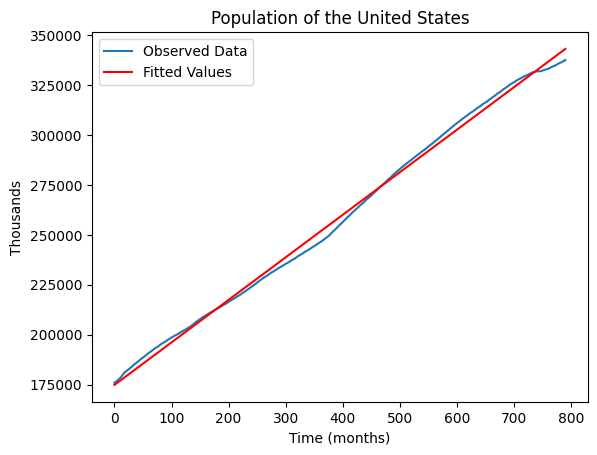

In [6]:
import matplotlib.pyplot as plt
plt.plot(y, label = "Observed Data")
plt.plot(linmod.fittedvalues, label = 'Fitted Values', color = 'red')
plt.xlabel('Time (months)')
plt.ylabel('Thousands')
plt.title('Population of the United States')
plt.legend()
plt.show()

Using the model to predict January 2025

In [9]:
y_int = linmod.params.iloc[0]
grad = linmod.params.iloc[1]

pred_jan_25 = y_int + grad * 792 # we want to predict the 792nd value

In [10]:
pred_jan_25

np.float64(343457.47086047125)

In [ ]:
# method 2

linmod.get_prediction([1, 792]).summary_frame() #  input feature vector [1, 792].
#use linmod.get_prediction([[1, 793], [1, 795]]).summary_frame() to get multiple predictions at x = 793 and x = 795


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,343457.47086,198.059689,343068.684602,343846.257119,337981.581863,348933.359858


| Column                                   | Meaning                                                                                                                                                                                                                                                                  |
| ---------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **mean**                                 | The predicted value of the dependent variable $\hat{y}$, here it's **343457.47**                                                                                                                                                                                         |
| **mean\_se**                             | Standard error of the predicted mean, **198.06** — tells how much uncertainty there is in the mean prediction                                                                                                                                                            |
| **mean\_ci\_lower**, **mean\_ci\_upper** | Lower and upper bounds of the **confidence interval for the mean prediction**. So, the true mean $\mu_y$ for input 792 lies between **343068.68** and **343846.26** with 95% confidence                                                                                  |
| **obs\_ci\_lower**, **obs\_ci\_upper**   | Lower and upper bounds of the **prediction interval for an individual observation** — accounts for both model uncertainty and random noise. So, an actual future observed $y$ for $x = 792$ will likely fall between **337981.58** and **348933.36** with 95% confidence |


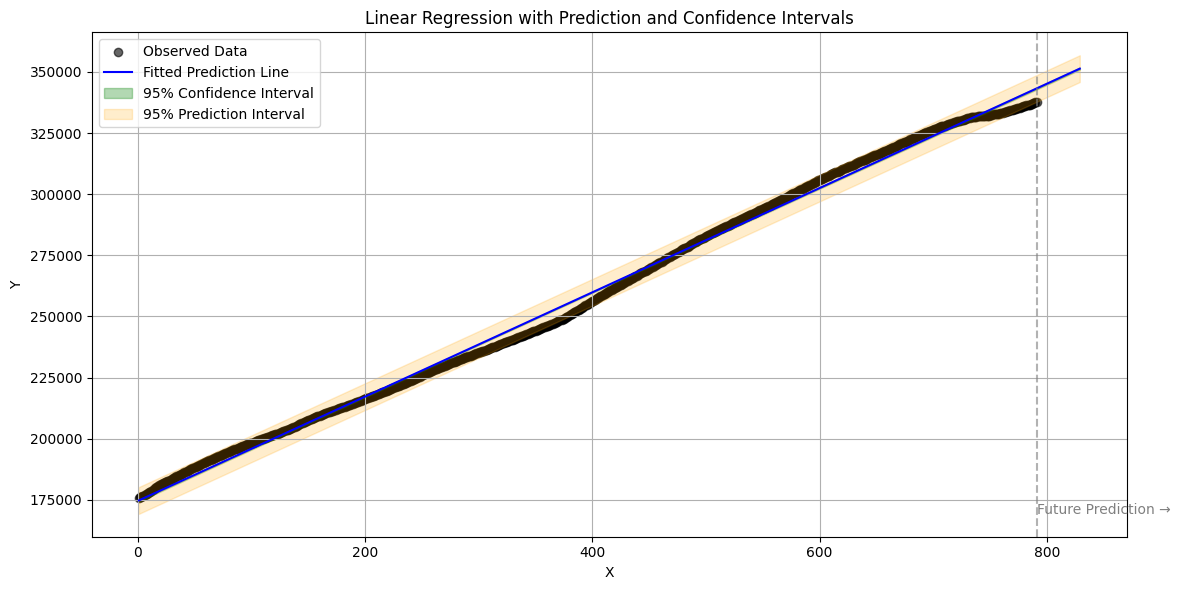

In [18]:

# Predict on next 30 values
x_future = np.arange(800, 830)
X_future = sm.add_constant(x_future)
predictions_future = linmod.get_prediction(X_future)
summary_future = predictions_future.summary_frame()

summary_train = linmod.get_prediction(X).summary_frame()

# Combine all for plotting
x_all = np.concatenate([x, x_future])
mean_all = np.concatenate([summary_train['mean'], summary_future['mean']])
ci_lower_all = np.concatenate([summary_train['mean_ci_lower'], summary_future['mean_ci_lower']])
ci_upper_all = np.concatenate([summary_train['mean_ci_upper'], summary_future['mean_ci_upper']])
pi_lower_all = np.concatenate([summary_train['obs_ci_lower'], summary_future['obs_ci_lower']])
pi_upper_all = np.concatenate([summary_train['obs_ci_upper'], summary_future['obs_ci_upper']])

# Plotting
plt.figure(figsize=(12, 6))

# Original data
plt.scatter(x, y, color='black', label='Observed Data', alpha=0.6)

# Fitted line
plt.plot(x_all, mean_all, color='blue', label='Fitted Prediction Line')

# Confidence interval
plt.fill_between(x_all, ci_lower_all, ci_upper_all, color='green', alpha=0.3, label='95% Confidence Interval')

# Prediction interval
plt.fill_between(x_all, pi_lower_all, pi_upper_all, color='orange', alpha=0.2, label='95% Prediction Interval')

# Formatting
plt.axvline(x=max(x), color='gray', linestyle='--', alpha=0.6)  # mark boundary of training/future
plt.text(max(x)+0.5, min(pi_lower_all), 'Future Prediction →', color='gray')

plt.title('Linear Regression with Prediction and Confidence Intervals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Amazon dataset

In [20]:
amazon = pd.read_csv('./datasets/Amazondataset.csv')
#we are skipping the first row as it does not contain any data 
print(amazon.head())
amazon.columns = ['Month', 'AmazonTrends']
print(amazon.tail(10))

     Month  amazon: (United States)
0  2004-01                       10
1  2004-02                        9
2  2004-03                        9
3  2004-04                        9
4  2004-05                        9
       Month  AmazonTrends
248  2024-09            59
249  2024-10            62
250  2024-11            64
251  2024-12            72
252  2025-01            58
253  2025-02            55
254  2025-03            56
255  2025-04            57
256  2025-05            56
257  2025-06            60


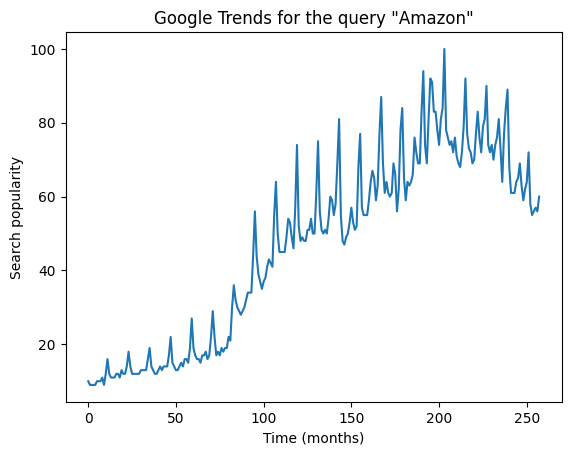

In [21]:
#Here is a plot of the data
plt.plot(amazon['AmazonTrends'])
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google Trends for the query "Amazon"')
plt.show()

In [22]:
#Fitting a line: 
y = amazon['AmazonTrends'] #should we be taking logs instead as in y = np.log(amazon['AmazonTrends'])
x = np.arange(1, len(y) + 1)
X = sm.add_constant(x)
linmod = sm.OLS(y, X).fit()
print(linmod.summary())

                            OLS Regression Results                            
Dep. Variable:           AmazonTrends   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1241.
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          3.66e-100
Time:                        22:24:19   Log-Likelihood:                -971.71
No. Observations:                 258   AIC:                             1947.
Df Residuals:                     256   BIC:                             1955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6020      1.311      5.036      0.0

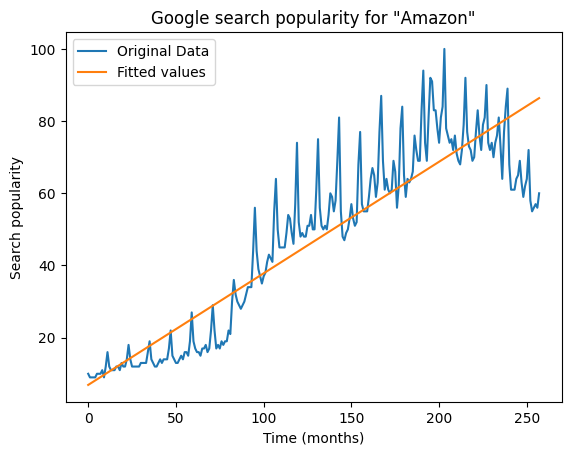

In [23]:
plt.plot(y, label = 'Original Data')
plt.plot(linmod.fittedvalues, label = "Fitted values")
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()

Adding a quadratic term

In [24]:
#Let us add a quadratic term: 
x2 = x ** 2
X = np.column_stack([x, x2])
X = sm.add_constant(X)
quadmod = sm.OLS(y, X).fit()
print(quadmod.summary())

                            OLS Regression Results                            
Dep. Variable:           AmazonTrends   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     815.5
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          1.60e-111
Time:                        22:24:54   Log-Likelihood:                -941.41
No. Observations:                 258   AIC:                             1889.
Df Residuals:                     255   BIC:                             1899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2224      1.761     -2.398      0.0

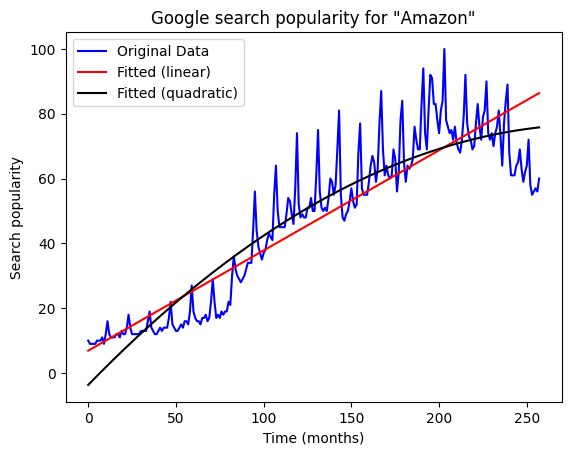

In [25]:
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(linmod.fittedvalues, label = "Fitted (linear)", color = 'red')
plt.plot(quadmod.fittedvalues, label = "Fitted (quadratic)", color = 'black')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()

In [26]:
#Cubic term: 
x2 = x ** 2
x3 = x ** 3
X = np.column_stack([x, x2, x3])
X = sm.add_constant(X)
cubmod = sm.OLS(y, X).fit()
print(cubmod.summary())

                            OLS Regression Results                            
Dep. Variable:           AmazonTrends   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1005.
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          1.46e-140
Time:                        22:25:11   Log-Likelihood:                -869.93
No. Observations:                 258   AIC:                             1748.
Df Residuals:                     254   BIC:                             1762.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2025      1.795      6.797      0.0

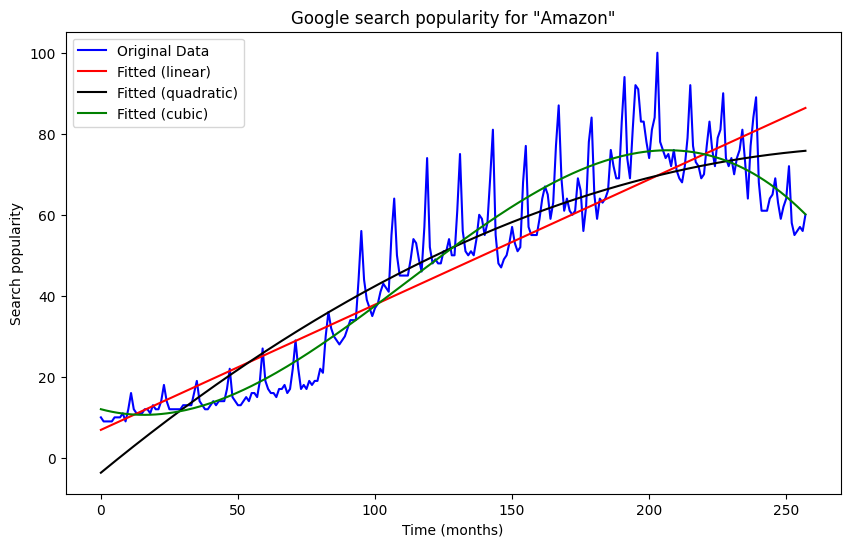

In [27]:
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(linmod.fittedvalues, label = "Fitted (linear)", color = 'red')
plt.plot(quadmod.fittedvalues, label = "Fitted (quadratic)", color = 'black')
plt.plot(cubmod.fittedvalues, label = "Fitted (cubic)", color = 'green')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()

Now the fit is pretty good. This is a monthly dataset which also has a clear seasonal pattern. Some months in each year have a high yy value compared to other months. We can capture this seasonal pattern by adding cosines and sines to the regression model. The simplest seasonal functions with period 12 are cos⁡(2πx/12)cos(2πx/12) and sin⁡(2πx/12)sin(2πx/12). Let us add these to the model.

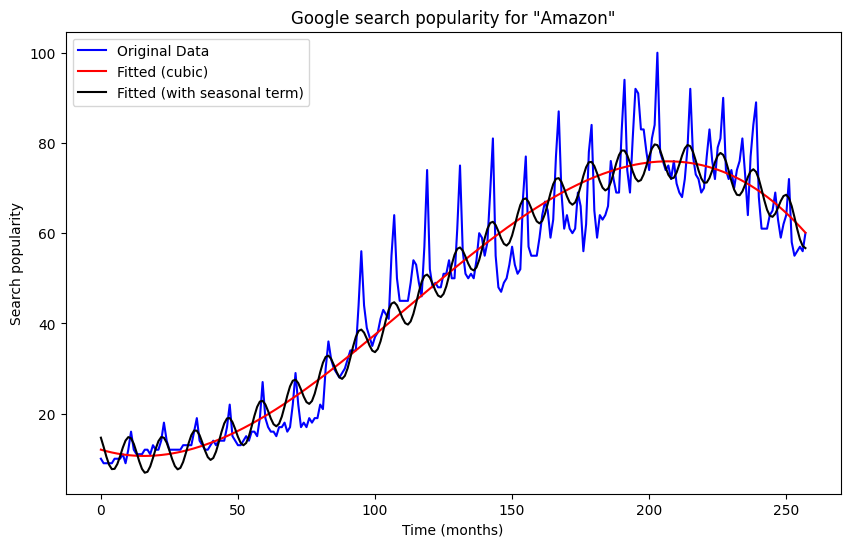

In [28]:
#Adding seasonal terms to the model: 
x4 = np.cos(2 * np.pi * x * (1/12))
x5 = np.sin(2 * np.pi * x * (1/12))
X = np.column_stack([x, x2, x3, x4, x5])
X = sm.add_constant(X)
seasmod1 = sm.OLS(y, X).fit()
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(cubmod.fittedvalues, label = "Fitted (cubic)", color = 'red')
plt.plot(seasmod1.fittedvalues, label = "Fitted (with seasonal term)", color = 'black')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()


The fit is better but the seasonal term is not enough to capture the actual oscillation present in the data. We improve the fit by adding two more seasonal functions cos⁡(2πx(2/12))cos(2πx(2/12)) and sin⁡(2πx(2/12))sin(2πx(2/12)).

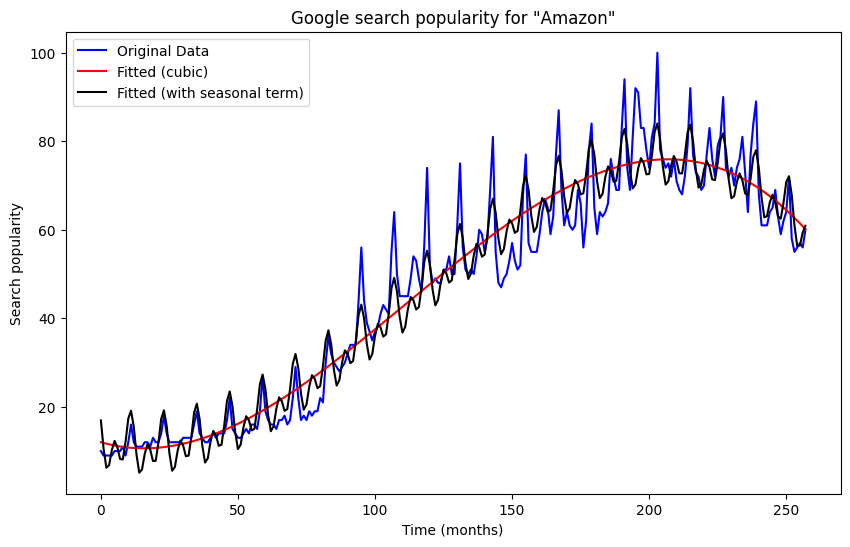

In [29]:
#Adding seasonal terms to the model: 
x4 = np.cos(2 * np.pi * x * (1/12))
x5 = np.sin(2 * np.pi * x * (1/12))
x6 = np.cos(2 * np.pi * x * (2/12))
x7 = np.sin(2 * np.pi * x * (2/12))
X = np.column_stack([x, x2, x3, x4, x5, x6, x7])
X = sm.add_constant(X)
seasmod = sm.OLS(y, X).fit()
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(cubmod.fittedvalues, label = "Fitted (cubic)", color = 'red')
plt.plot(seasmod.fittedvalues, label = "Fitted (with seasonal term)", color = 'black')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()


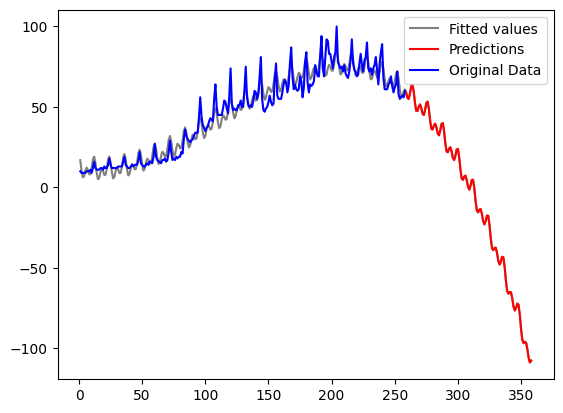

In [30]:
#Computing future predictions: 
nf = 100 #number of future points where we are calculating predictions
xf = np.arange(len(x) + 1, len(x) + 1 + nf) #these are the future time points
x2f = xf ** 2
x3f = xf ** 3
x4f = np.cos(2 * np.pi * xf * (1/12))
x5f = np.sin(2 * np.pi * xf * (1/12))
x6f = np.cos(2 * np.pi * xf * (2/12))
x7f = np.sin(2 * np.pi * xf * (2/12))
Xf = np.column_stack([xf, x2f, x3f, x4f, x5f, x6f, x7f])
Xf = sm.add_constant(Xf)
pred = Xf @ np.array(seasmod.params) #these are the predictions


#Plotting the data, fitted values and predictions
xall = np.concatenate([x, xf])
fittedpred = np.concatenate([seasmod.fittedvalues, pred])
#plt.figure(figsize = (10, 6))
#print(x)
#print(xf)
plt.plot(xall, fittedpred, color = 'gray', label = 'Fitted values')
plt.plot(xf, pred, color = 'red', label = 'Predictions')
plt.plot(x, y, label = 'Original Data', color = 'blue')
plt.legend()
plt.show()

Note that the future predictions become negative after a certain time. This is because the predictions follow the decreasing trend in the cubic function near the right end of the dataset. In this particular problem, negative predictions are meaningless. This issue can be fixed if we fit models to the logarithms of the original data. 

The model predictions will then have to be exponentiated if we want predictions for the original data. This exponentiation will ensure that all predictions are positive.

[3.99400381 3.92893306 3.91413107 3.98502392 4.08585517 4.1174478
 4.03191837 3.8808244  3.76852659 3.75608492 3.80957974 3.84202269
 3.80480483 3.73603843 3.71752184 3.78468115 3.88175989 3.90958107
 3.82026124 3.66535792 3.54923181 3.53294288 3.58257149 3.61112929
 3.57000733 3.49731787 3.47485927 3.53805762 3.63115645 3.65497877
 3.56164113 3.40270106 3.28251923 3.26215564 3.30769064 3.33213588
 3.2868824  3.21004248 3.18341446 3.24242445 3.33131596 3.35091201
 3.25332916 3.09012491 2.96565997 2.9409943  2.98220829 3.00231355
 2.95270115 2.87148336 2.84045852 2.89505273 2.97950952 2.9946519
 2.89259642 2.7249006  2.59592512 2.56672998 2.60339554 2.61893342
 2.5647347  2.47891162 2.44326255 2.49321358 2.57300824 2.58346953
 2.47671402 2.30429921 2.17058581 2.13663378 2.1685235  2.1792666
 2.12025413 2.02959837 1.98909766 2.0341781  2.10908322 2.11463602
 2.00295307 1.82559187 1.68691312 1.6479768  1.67486327 1.68058418
 1.61653057 1.52081471 1.47523495 1.51521739 1.58500557 1.5854224

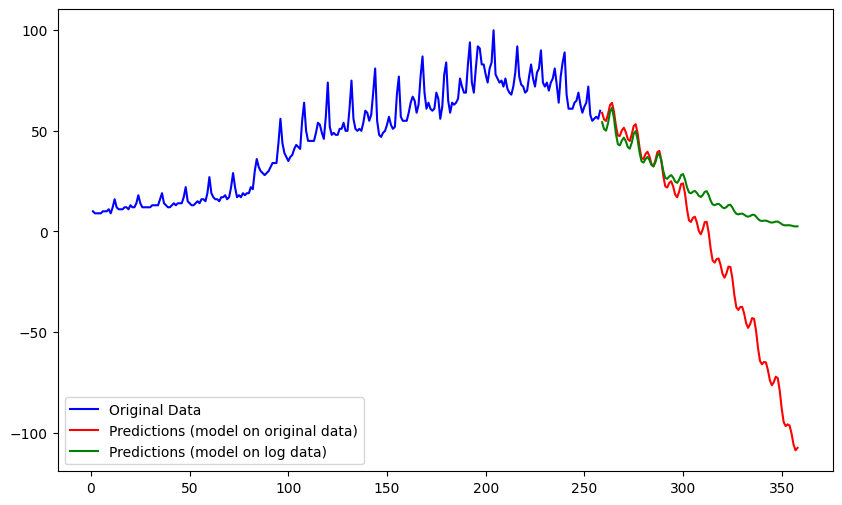

In [31]:
#Prediction on log(data):
ylog = np.log(amazon['AmazonTrends'])
seasmodlog = sm.OLS(ylog, X).fit()
predlog = Xf @ np.array(seasmodlog.params)
print(predlog)

xall = np.concatenate([x, xf])
fittedpred_logmodel = np.concatenate([np.exp(seasmodlog.fittedvalues), np.exp(predlog)])
plt.figure(figsize = (10, 6))
#print(x)
#print(xf)
plt.plot(x, y, label = 'Original Data', color = 'blue')
plt.plot(xf, pred, color = 'red', label = 'Predictions (model on original data)')
#plt.plot(xall, fittedpred_logmodel, color = 'black')
plt.plot(xf, np.exp(predlog), color = 'green',  label = 'Predictions (model on log data)')
plt.legend()
plt.show()